#### Załadowanie danych

In [37]:
import os
import sys
sys.path.append('..')
from src.data import load_dataset

X, y = load_dataset()
y = y.apply(lambda val: 1 if '>50K' in val else 0)

#### Import bibliotek

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import(confusion_matrix, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay,  classification_report)
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

#### Sprawdzenie skorelowania zmiennych

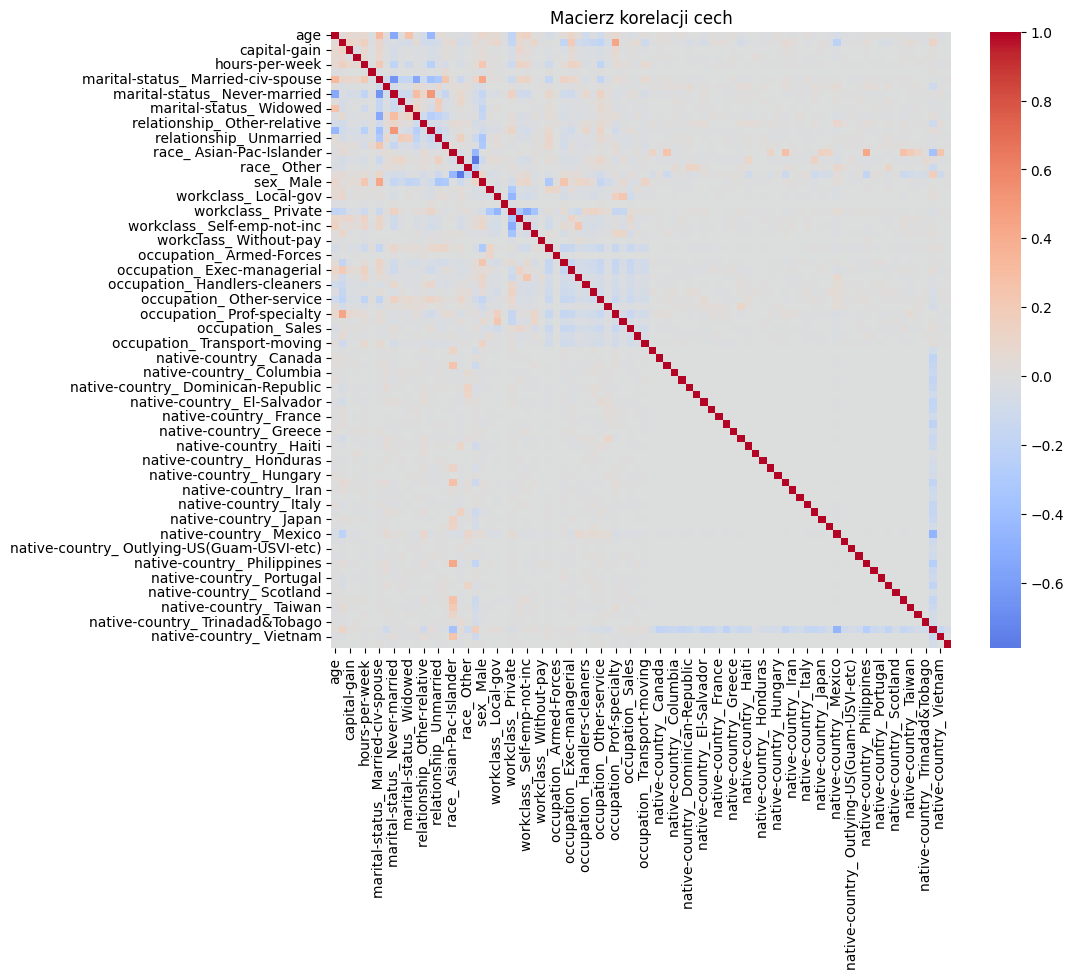

In [39]:
corr = X.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, cmap = 'coolwarm', center = 0, annot = False)
plt.title("Macierz korelacji cech")
plt.show()

Nie ma pary zmiennych bardzo skorelowanych, więc nie usuwamy już kolumn

#### Podział na zbiory treingowy i testowy

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Stworzenie i wytrenowanie modelu

In [41]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

os.makedirs('../models', exist_ok=True)
joblib.dump(nb_model, '../models/naive_model.pkl')

['../models/naive_model.pkl']

#### Dopasowanie modelu

In [42]:
y_pred = nb_model.predict(X_test)
y_proba = nb_model.predict_proba(X_test)[:, 1]

#### Krzywa ROC

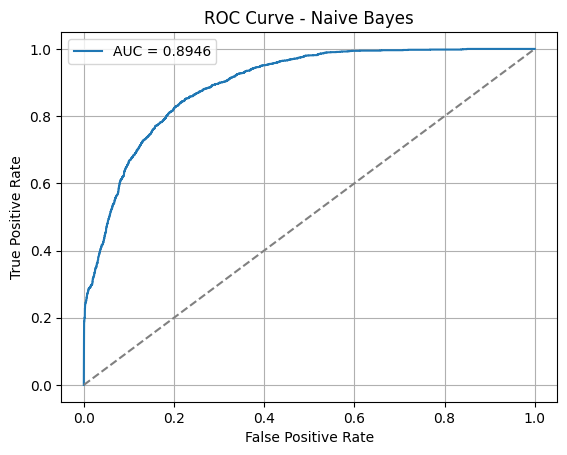

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label = f'AUC = {roc_auc_score(y_test, y_proba):.4f}')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend()
plt.grid()
plt.show()

#### Raport 

In [44]:
print("                 Classification Report:")
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred, digits = 4))

                 Classification Report:
--------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9201    0.8414    0.8790      4942
           1     0.6068    0.7702    0.6788      1571

    accuracy                         0.8242      6513
   macro avg     0.7635    0.8058    0.7789      6513
weighted avg     0.8445    0.8242    0.8307      6513



#### Macierz pomyłek

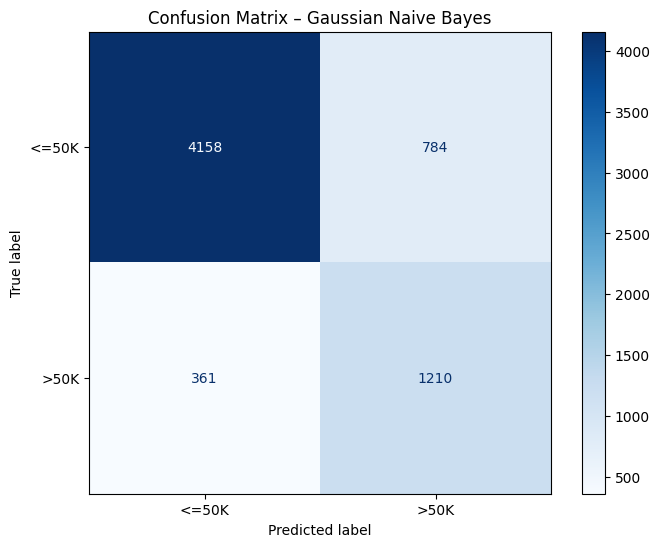

In [45]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix – Gaussian Naive Bayes")
plt.show()